# Kerasによるニューラルネット実装例(Gray)

In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras.datasets import cifar100
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import func

Using TensorFlow backend.


In [57]:
# 自分で設定するパラメータ
batch_size = 128
select_label = ['table','tank','telephone',airplane'']
num_classes = len(select_label)
epochs = 50

In [58]:
# データ抽出
((x_train,y_train),(x_test, y_test)) = select_data(select_label)

# データ整形
## x_trainをグレースケールに変換する
x_train =np.array([np.asarray(Image.fromarray(np.uint8(i)).convert('L')) for i in x_train])
## x_trainを行列からベクトルにする
x_train = x_train.reshape(x_train.shape[0],32*32)

## x_testをグレースケールに変換する
x_test =np.array([np.asarray(Image.fromarray(np.uint8(i)).convert('L')) for i in x_test])
## x_testを行列からベクトルにする
x_test = x_test.reshape(x_test.shape[0],32*32)

## x_train, x_testを正規化する
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

## データシェイプの確認
print(x_train.shape, 'train samples')
print(x_test.shape, 'test samples')

/Users/kazuki/.pyenv/versions/3.6.1/lib/python3.6/site-packages/ipykernel_launcher.py:131: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.


(1500, 1024) train samples
(300, 1024) test samples


In [59]:
# モデル構築
model = Sequential()

# 最初の隠れ層(入力1024-> 出力512)
model.add(Dense(512, activation='relu', input_shape=(1024,)))
model.add(Dropout(0.2))

# 隠れ層(入力512 -> 出力512)
## 隠れ層は追加可能
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))

# 出力層(入力512 -> 出力:クラス数)
model.add(Dense(num_classes, activation='softmax'))

# モデル概要表示
model.summary()

# モデルのコンパイル
model.compile(loss='categorical_crossentropy',
#               optimizer=RMSprop(),
              optimizer='adam',
              metrics=['accuracy'])

# フィッティング(学習)
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

# スコア計算・表示
score = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 512)               524800    
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 3)                 1539      
Total params: 788,995
Trainable params: 788,995
Non-trainable params: 0
_________________________________________________________________
Train on 1500 samples, validate on 300 samples
Epoch 1/50
1500/1500 [==============================] - 1s - loss: 1.2371 - acc: 0.4260 -

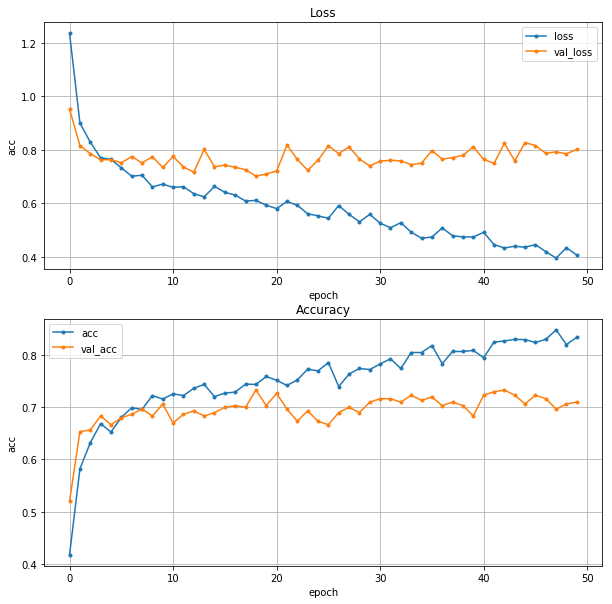

In [52]:
import matplotlib.pyplot as plt
# plot results
loss = history.history['loss']
val_loss = history.history['val_loss']

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.title('Loss')
epochs = len(loss)
plt.plot(range(epochs), loss, marker='.', label='loss')
plt.plot(range(epochs), val_loss, marker='.', label='val_loss')
plt.legend(loc='best')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('acc')

plt.subplot(2,1,2)
plt.title('Accuracy')
plt.plot(range(epochs), acc, marker='.', label='acc')
plt.plot(range(epochs), val_acc, marker='.', label='val_acc')
plt.legend(loc='best')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

plt.savefig('rms_cifar3_50epochs.png')

In [7]:
# 学習モデルの保存
model.save("trained_data")

# モデルのテスト

(32, 32)


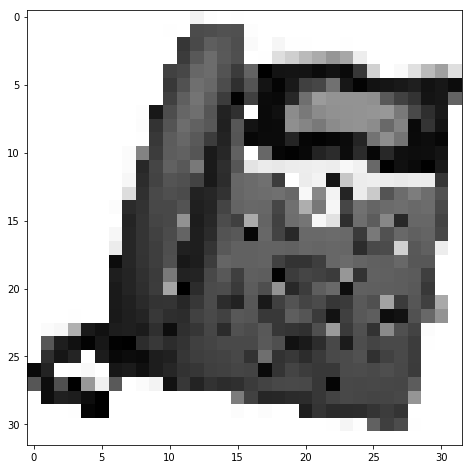

In [54]:
# 画像読み込み
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

#Jupyterでインライン表示するための宣言
%matplotlib inline 

fig = plt.figure(figsize=(8,8))

#画像の読み込み
org_img = Image.open("./telephone1.jpeg")

#解像度変更
gray_img = org_img.resize((32,32))
gray_img = gray_img.convert('L')

#画像をarrayに変換
im_list = np.array(gray_img, 'f')
print(im_list.shape)

#正規化
im_list = im_list/255

#画像表示
plt.imshow(im_list,cmap=plt.get_cmap('gray'))

In [55]:
# 読み込んだ画像の判別

print(im_list.shape)
test = im_list.reshape(1,1024)

# 判別値の確率
print(model.predict(test))
print('\n')

#判別結果
print("Result:",select_label[np.argmax(model.predict(test)[0])])

(32, 32)
[[  6.64742477e-03   9.37062607e-04   9.92415428e-01]]


Result: telephone
